# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv(r'data/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


# Train Test Split

In [7]:
X = df.drop('package', axis=1)
y = df['package']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

# Visualization

## Distribution of cgpa

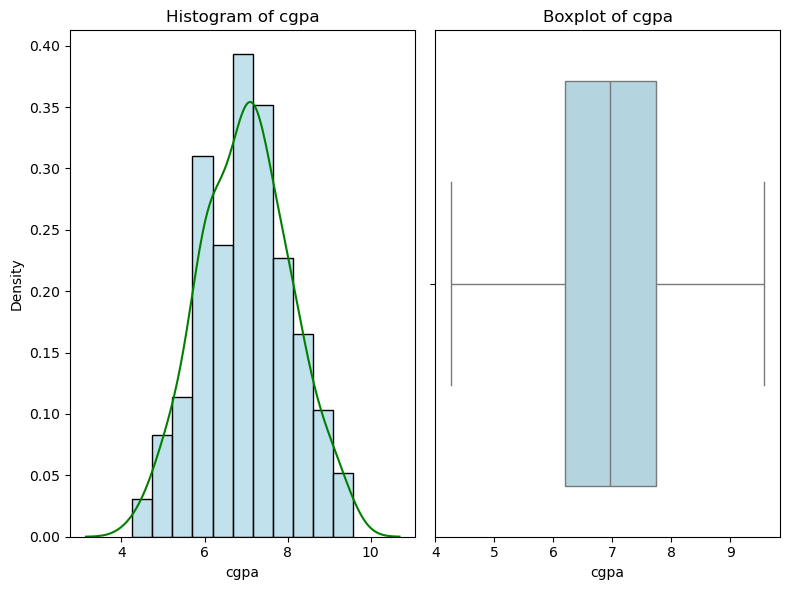

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

sns.histplot(data=df, x='cgpa', stat='density', color='lightblue', ax=ax[0])
sns.kdeplot(data=df, x='cgpa', color='green', ax=ax[0])
ax[0].set_title('Histogram of cgpa')

sns.boxplot(data=df, x='cgpa', color='lightblue', ax=ax[1])
ax[1].set_title('Boxplot of cgpa')

plt.tight_layout()
plt.show()

* No outliers, data is almost normal distribution

## Scatter Plot - cgpa vs package

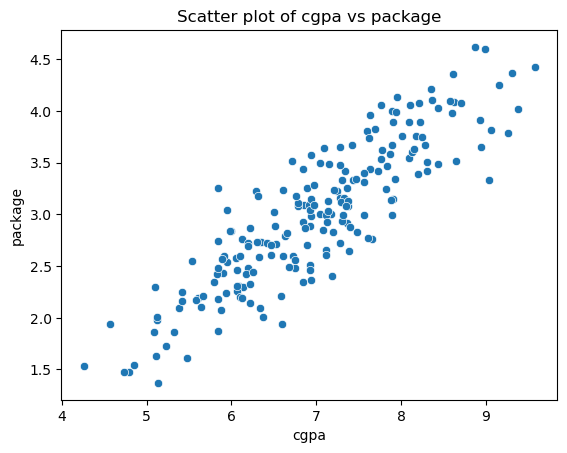

In [13]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.title('Scatter plot of cgpa vs package')
plt.show();

* Data is almost linear

# Linear Regression

In [14]:
lr = LinearRegression()

## Fit the model

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

## Prediction on test data

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

## Visualize best fit line

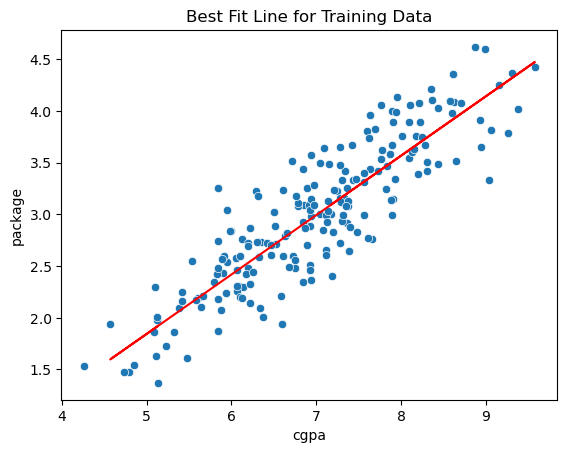

In [17]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Best Fit Line for Training Data')
plt.show();

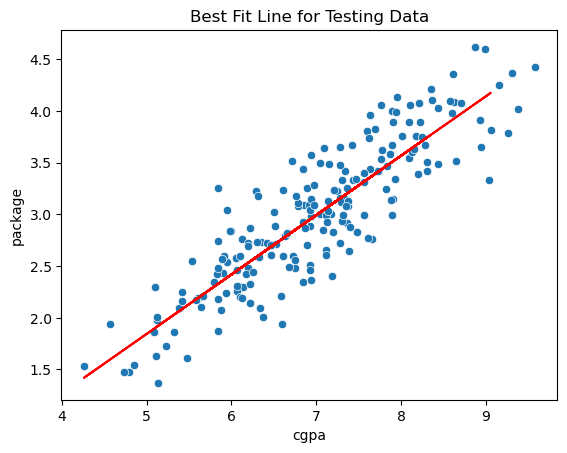

In [18]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('Best Fit Line for Testing Data')
plt.show();

## Slope and Intercept

In [19]:
m = lr.coef_
print('Slope of best fit line: ', m)

Slope of best fit line:  [0.57425647]


In [20]:
b = lr.intercept_
print('Y-Intercept: ', b)

Y-Intercept:  -1.02700693745421


## Test on new data

In [21]:
predicted_package = lr.predict([[7.82]])
predicted_package

array([3.46367868])

In [22]:
# y = mx + b
m * 7.82 + 2.99 

array([7.48068562])

# Regression Metrics

## MAE

In [23]:
print('MAE: ', mean_absolute_error(y_test, y_pred))

MAE:  0.23150985393278373


* Model is making 0.23 lpa error

## MSE

In [24]:
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.08417638361329657


* Model is making 0.08 lpa*lpa error

## RMSE

In [25]:
print('RMSE: ', root_mean_squared_error(y_test, y_pred))

RMSE:  0.2901316659954521


* Model is making 0.29 lpa error

## R2 Score

In [26]:
r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

R2 score:  0.7730984312051673


## Adjusted R2 Score

In [27]:
print('Adjusted R2 score: ', (1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)))

Adjusted R2 score:  0.7671273372895138


n, k are taken from X_test

## Effect of addition of features on R2 & Adjusted R2 Score

### Irrelevent Feature

In [28]:
df_irr_feature = df.copy()
df_irr_feature['random_feature'] = np.random.random(200)

df_irr_feature = df_irr_feature[['cgpa', 'random_feature', 'package']]
df_irr_feature.head()

,cgpa,random_feature,package
0,6.89,0.766576,3.26
1,5.12,0.484413,1.98
2,7.82,0.541940,3.25
3,7.42,0.874584,3.67
4,6.94,0.751290,3.57


#### Train Test Split

In [29]:
X = df_irr_feature.drop('package', axis=1)
y = df_irr_feature['package']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

#### Scatter Plot - random_feature vs pakage

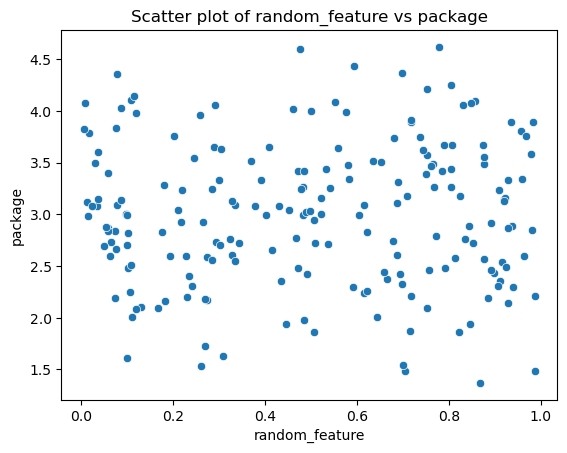

In [32]:
sns.scatterplot(data=df_irr_feature, x='random_feature', y='package')
plt.title('Scatter plot of random_feature vs package')
plt.show();

#### Standardization

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Prediction on test data

In [37]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([2.7890163 , 3.12774391, 3.20959868, 2.38807529, 3.54207206,
       3.77685186, 3.16562399, 2.55843174, 3.16410102, 3.5082244 ,
       1.90078572, 2.33726298, 3.69946207, 2.76432835, 3.4840624 ,
       3.0466029 , 2.33208039, 3.19045005, 2.16974198, 3.31427411,
       2.46579298, 2.91414112, 3.30647188, 2.85748022, 3.35234714,
       2.206526  , 1.41080721, 2.72235589, 3.19611407, 2.32552017,
       3.75064295, 2.94303973, 3.69058718, 2.96555877, 2.57689498,
       3.35506555, 2.46600126, 3.08682026, 4.16105505, 2.97187982])

#### R2 Score

In [38]:
r2 = r2_score(y_test, y_pred)
print('R2 score after adding irrelevant feature: ', r2)

R2 score after adding irrelevant feature:  0.7746834020020718


#### Adjusted R2 Score

In [39]:
print('Adjusted R2 score: ', (1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 2)))

Adjusted R2 score:  0.7625041264346162


### Relevant Feature

In [40]:
df_rel_feature = df.copy()
df_rel_feature['iq'] = df_rel_feature['package'] + (np.random.randint(-12,12,200)/10)

df_rel_feature = df_rel_feature[['cgpa','iq','package']]
df_rel_feature.head()

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,2.38,1.98
2,7.82,3.55,3.25
3,7.42,3.77,3.67
4,6.94,2.37,3.57


#### Train Test Split

In [41]:
X = df_rel_feature.drop('package', axis=1)
y = df_rel_feature['package']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

#### Scatter Plot - iq vs package 

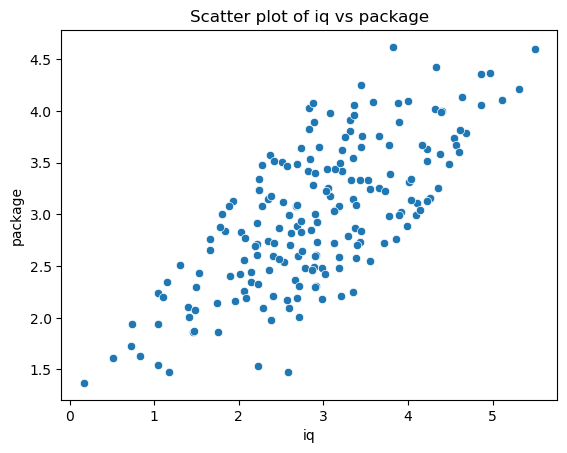

In [44]:
sns.scatterplot(data=df_rel_feature, x='iq', y='package')
plt.title('Scatter plot of iq vs package')
plt.show();

#### Standardization

In [45]:
scaler = StandardScaler()

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

#### Prediction on test data

In [49]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([2.90842704, 3.27873476, 3.45979746, 2.78081279, 3.27257923,
       4.1028097 , 3.09425649, 2.5529703 , 3.3436028 , 3.69293569,
       1.71186507, 2.19340657, 3.53205139, 2.87374833, 3.30114993,
       2.9999797 , 2.35520222, 3.21764881, 2.28655208, 3.4513477 ,
       2.53130403, 2.55541114, 3.24891195, 2.76915155, 3.34807633,
       2.19969287, 1.62288992, 2.72914542, 3.42542782, 2.44716894,
       3.49960945, 3.15001502, 3.71776592, 2.97536939, 2.78953993,
       3.61414385, 2.58897442, 3.33385931, 4.2773345 , 2.85112318])

#### R2 Score

In [50]:
r2 = r2_score(y_test, y_pred)
print('R2 score after adding relevent feature: ', r2)

R2 score after adding relevent feature:  0.7902532530865002


#### Adjusted R2 Score

In [51]:
print('Adjusted R2 score: ', (1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 2)))

Adjusted R2 score:  0.7789155910911758
